In [ ]:
pip install upsetplot

In [1]:
import pandas as pd
import numpy as np
import glob as glob
import matplotlib.pyplot as plt
import re
import random
import seaborn as sns
import scipy
import upsetplot

# Summary Stats

In [2]:
stats = pd.read_csv('summary_stats/summary_stats.csv')
stats

,P_05,P_01,LogFC_2,LogFC_5,Student,Aligner,DE
0,23089,20960,0.0,0.0,Annika,salmon,limma-voom
1,434,217,1394.0,47.0,Bethany,bowtie2,DESeq2
2,0,0,462.0,13.0,Cory_QLF,bowtie2,EdgeR
3,306,177,465.0,13.0,Cory_ET,bowtie2,EdgeR
4,437,243,951.0,53.0,Cynthia,BWA,EdgeR
5,546,310,361.0,26.0,David,BWA,DESeq2
6,549,304,429.0,20.0,Emilie,kallisto,DESeq2
7,2305,1115,536.0,8.0,Noah,kallisto,EdgeR
8,2336,799,831.0,11.0,Irene,kallisto,limma-voom
9,19009,17136,12622.0,2271.0,Jordan,bowtie2,limma-voom


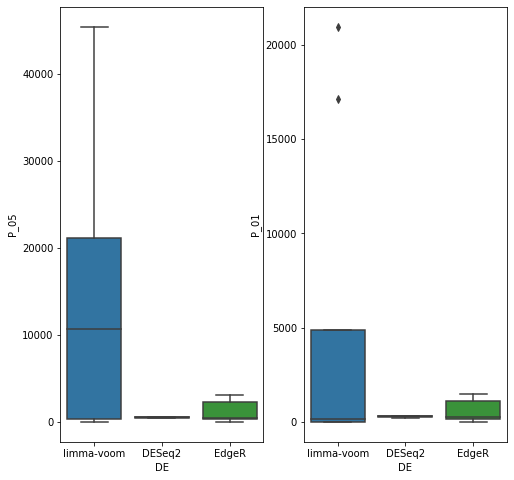

In [3]:
fig ,axs = plt.subplots(1,2, figsize = [8,8])
sns.boxplot(data = stats, x = 'DE', y='P_05', ax = axs[0])
sns.boxplot(data = stats, x = 'DE', y='P_01', ax = axs[1])


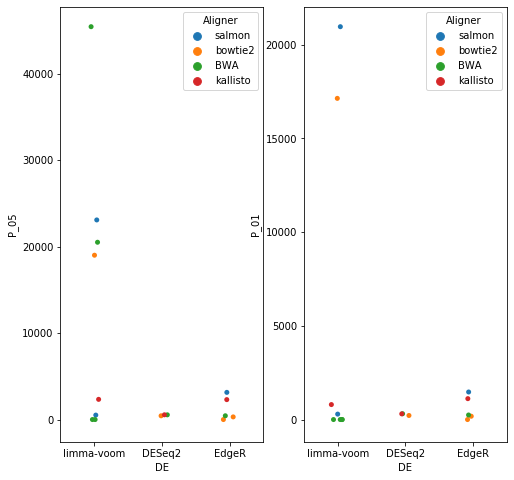

In [4]:
fig ,axs = plt.subplots(1,2, figsize = [8,8])

sns.stripplot(data = stats, x = 'DE', y='P_05', hue='Aligner', ax = axs[0])
sns.stripplot(data = stats, x = 'DE', y='P_01', hue='Aligner', ax = axs[1])



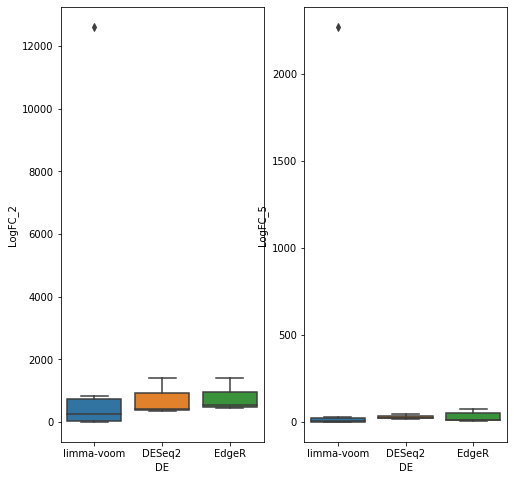

In [5]:
fig ,axs = plt.subplots(1,2, figsize = [8,8])

sns.boxplot(data = stats, x = 'DE', y='LogFC_2', ax = axs[0])
sns.boxplot(data = stats, x = 'DE', y='LogFC_5', ax = axs[1])


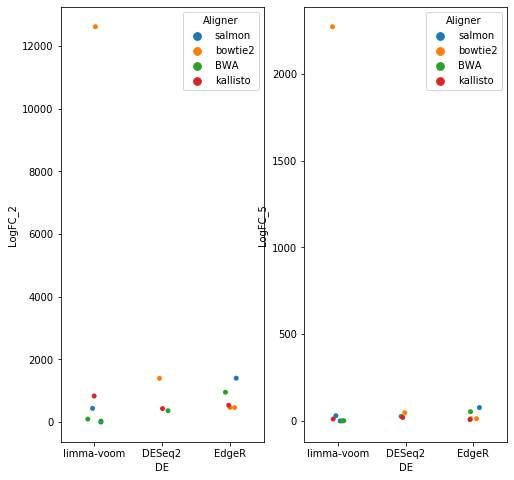

In [6]:
fig ,axs = plt.subplots(1,2, figsize = [8,8])

sns.stripplot(data = stats, x = 'DE', y='LogFC_2', hue='Aligner', ax = axs[0])
sns.stripplot(data = stats, x = 'DE', y='LogFC_5', hue='Aligner', ax = axs[1])

# sns.stripplot(data = stats, x = 'DE', y='LogFC_2', hue='Aligner', ax = axs[1][0])
# sns.stripplot(data = stats, x = 'DE', y='LogFC_5', hue='Aligner', ax = axs[1][1])
# axs[1][0].set_ylim(0,1000)
# axs[1][1].set_ylim(0,50)


In [7]:
pval = pd.read_csv('summary_stats/pval_summary.csv')
for name, df in pval.groupby(['DE']):
    print(name, len(df))

DESeq2 80
EdgeR 100
limma-voom 120


In [8]:
def make_dicts(dfile):
    pval_dict = {}
    split_dict = {}
    with open(dfile, 'r') as f:
        for i, line in enumerate(f):
            if i == 0:
                pass
            else:
                l= line.strip().split(',')
                name=':'.join(l[1:])
                de = l[-1]
                contig = l[0]
                if name in pval_dict:
                    pval_dict[name].add(contig)
                else:
                    pval_dict[name]=set([contig])

    for key in pval_dict:
        de = key.split(':')[2]
        if de in split_dict:
            split_dict[de][key.split(':')[0]]=pval_dict[key]
        else:
            split_dict[de]={key.split(':')[0]:pval_dict[key]}
    return pval_dict, split_dict



In [9]:
pval_dict, split_dict = make_dicts('summary_stats/pval_summary.csv')
up_dict, split_up = make_dicts('summary_stats/logFC_up_summary.csv')
dn_dict, split_dn = make_dicts('summary_stats/logFC_down_summary.csv')

{'matrix': <matplotlib.axes._subplots.AxesSubplot at 0x1a21c42908>,
 'shading': <matplotlib.axes._subplots.AxesSubplot at 0x1a20f04eb8>,
 'totals': <matplotlib.axes._subplots.AxesSubplot at 0x1a21bc8438>,
 'intersections': <matplotlib.axes._subplots.AxesSubplot at 0x1a2127f860>}

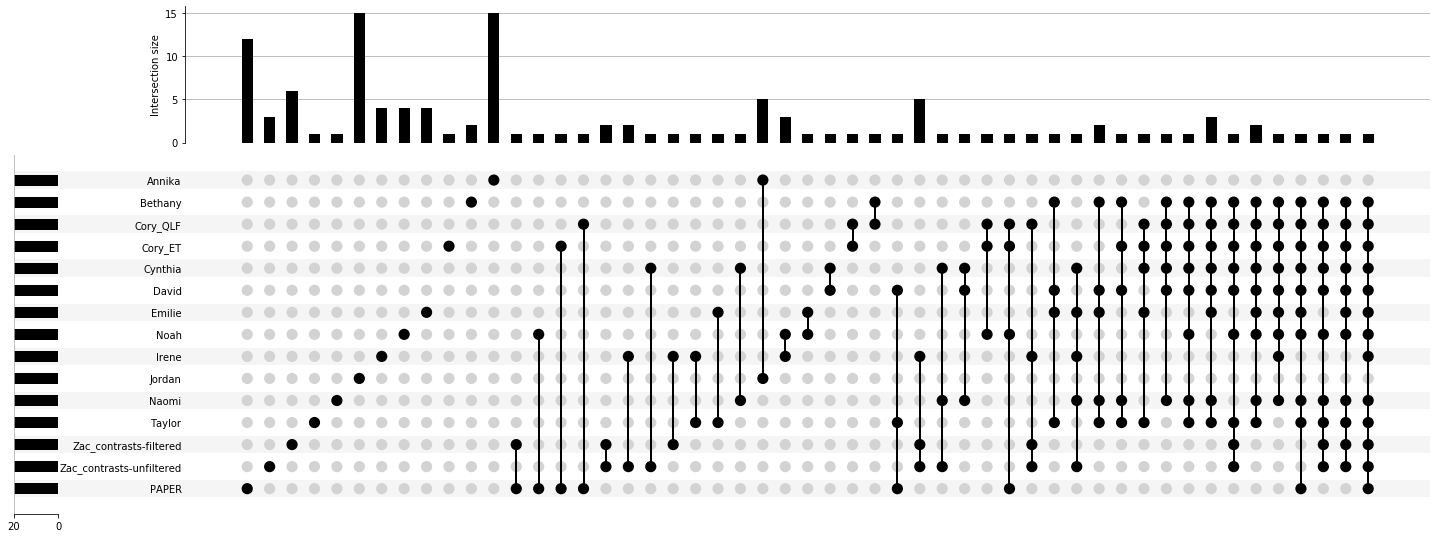

In [10]:
# de_upset = upsetplot.from_contents(split_dict[key])
# p = upsetplot.plot(de_upset,sum_over=False, sort_by='degree')
# plt.suptitle(key)
newdict = {}
for key in pval_dict:
    newdict[key.split(':')[0]]=pval_dict[key]
dd = upsetplot.from_contents(newdict)
upsetplot.plot(dd, sum_over=False)

{'matrix': <matplotlib.axes._subplots.AxesSubplot at 0x1a2198ae80>,
 'shading': <matplotlib.axes._subplots.AxesSubplot at 0x1a21acd710>,
 'totals': <matplotlib.axes._subplots.AxesSubplot at 0x1a224849e8>,
 'intersections': <matplotlib.axes._subplots.AxesSubplot at 0x1a217f8828>}

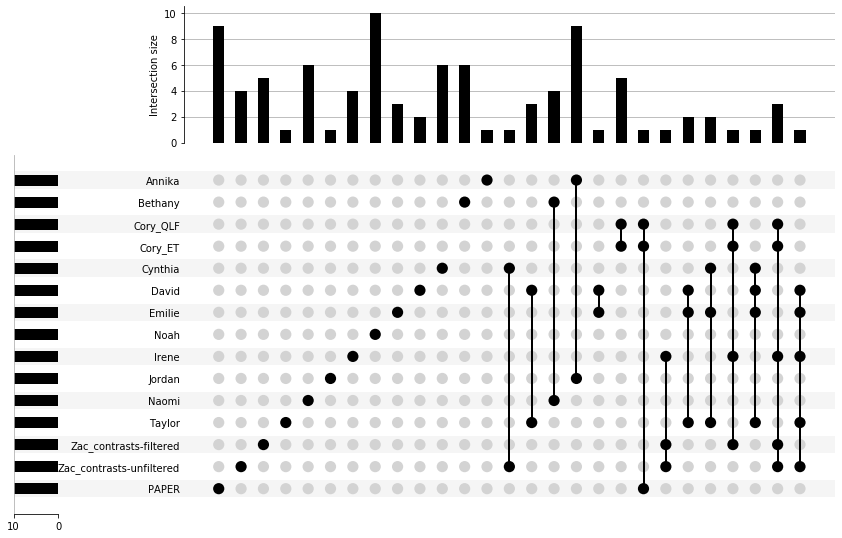

In [11]:
newdict = {}
for key in up_dict:
    newdict[key.split(':')[0]]=up_dict[key]
dd = upsetplot.from_contents(newdict)
upsetplot.plot(dd, sum_over=False)

In [12]:
pval_dict

{'Annika:salmon:limma-voom': {'contig#1089',
  'contig#1360',
  'contig#1368',
  'contig#148',
  'contig#157',
  'contig#1789',
  'contig#1845',
  'contig#19',
  'contig#1921',
  'contig#2418',
  'contig#2595',
  'contig#2656',
  'contig#2672',
  'contig#3156',
  'contig#359',
  'contig#4738',
  'contig#5502',
  'contig#5573',
  'contig#610',
  'contig#780'},
 'Bethany:bowtie2:DESeq2': {'contig#10302',
  'contig#11186',
  'contig#18028',
  'contig#18830',
  'contig#22638',
  'contig#23350',
  'contig#23665',
  'contig#24428',
  'contig#24502',
  'contig#24659',
  'contig#29424',
  'contig#30197',
  'contig#30258',
  'contig#36748',
  'contig#38785',
  'contig#46631',
  'contig#47100',
  'contig#7760',
  'contig#9231',
  'contig#9563'},
 'Cory_QLF:bowtie2:EdgeR': {'contig#10302',
  'contig#11186',
  'contig#18830',
  'contig#20746',
  'contig#22638',
  'contig#23350',
  'contig#23665',
  'contig#24428',
  'contig#24502',
  'contig#27366',
  'contig#29424',
  'contig#30197',
  'contig#30

# Pvals 

In [13]:
def upsets_plots(split_dict):
    for i, key in enumerate(split_dict.keys()):
        de_upset = upsetplot.from_contents(split_dict[key])
        p = upsetplot.plot(de_upset,sum_over=False, sort_by='degree')
        plt.suptitle(key)
def make_hists(split_dict):
    fig, axs = plt.subplots(1,3, figsize=(8,4))
    for i, key in enumerate(split_dict.keys()):
        de_upset = upsetplot.from_contents(split_dict[key])
        test = de_upset.reset_index().set_index('id').sum(axis=1)/len(split_dict[key])
        pd.DataFrame(test).plot(kind='hist', bins=5,range=[0,1], ax =axs[i], legend=False, color='gray', normed=1)
        axs[i].set_title(key+ ', n=%i'%len(split_dict[key]))
        axs[i].set_xlim(0,1)
    #     axs[i].set_ylim(0,80)
    fig.tight_layout()

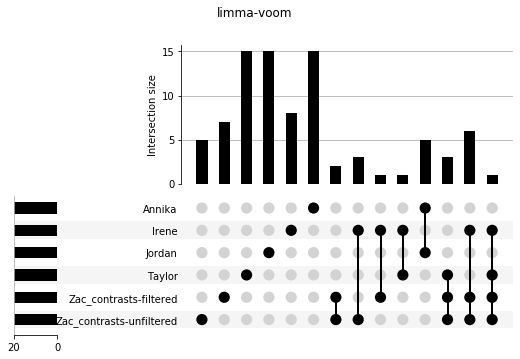

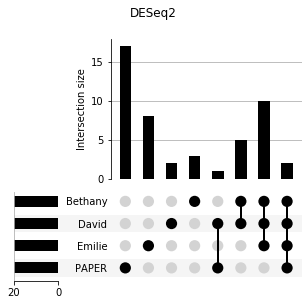

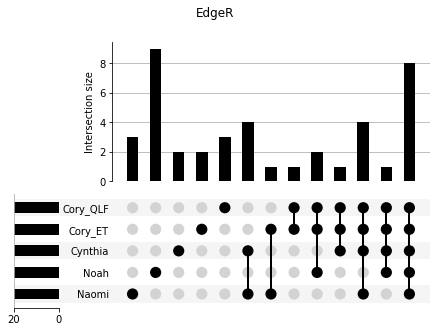

In [14]:
upsets_plots(split_dict)

# UP reg

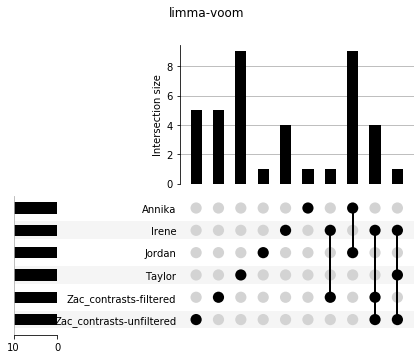

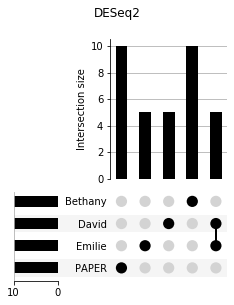

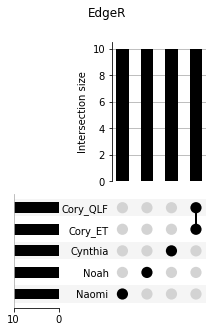

In [15]:
upsets_plots(split_up)

/Users/halexand/anaconda3/envs/python_lab/lib/python3.6/site-packages/pandas/plotting/_core.py:1344: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


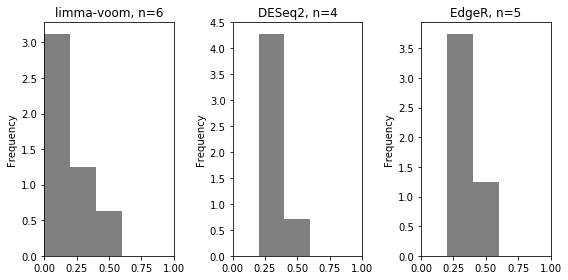

In [16]:
make_hists(split_up)

# 10 down

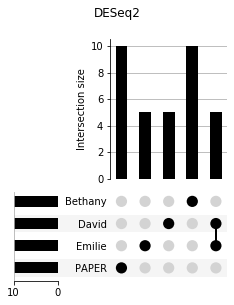

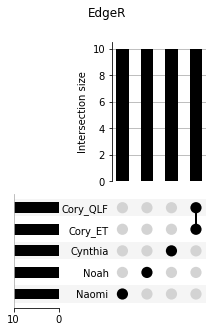

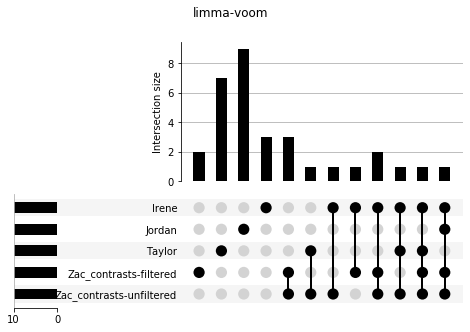

In [17]:
upsets_plots(split_dn)

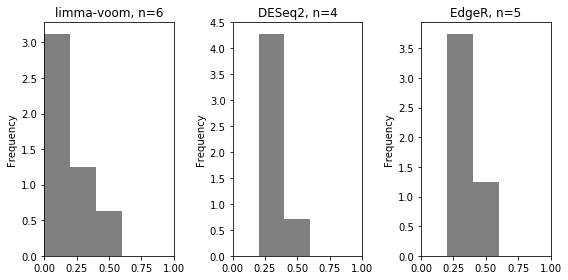

In [22]:
make_hists(split_up)

In [18]:
updf  = pd.read_csv('summary_stats/logFC_up_summary.csv')
downdf = pd.read_csv('summary_stats/logFC_down_summary.csv', )
pvaldict = pd.read_csv('summary_stats/pval_summary.csv')

In [21]:
paper = pd.read_csv('summary_stats/paper-report.csv', index_col=0).dropna(axis=1)


,Contig,Student,Aligner,DE
0,contig#43766,Annika,salmon,limma-voom
1,contig#42201,Annika,salmon,limma-voom
2,contig#16759,Annika,salmon,limma-voom
3,contig#31,Annika,salmon,limma-voom
4,contig#47679,Annika,salmon,limma-voom
5,contig#8215,Annika,salmon,limma-voom
6,contig#36,Annika,salmon,limma-voom
7,contig#20614,Annika,salmon,limma-voom
8,contig#9985,Annika,salmon,limma-voom
9,contig#32923,Annika,salmon,limma-voom
